In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Tempo de simulação
fs = 500e3  # frequência de amostragem
t = np.arange(0, 2e-3, 1/fs)  # 2 ms de duração

# Sinal modulante (mensagem)
fm = 100  # Hz
m = 2 * np.cos(2 * np.pi * fm * t)

# Portadora
fc = 20e3  # Hz
c = np.cos(2 * np.pi * fc * t)


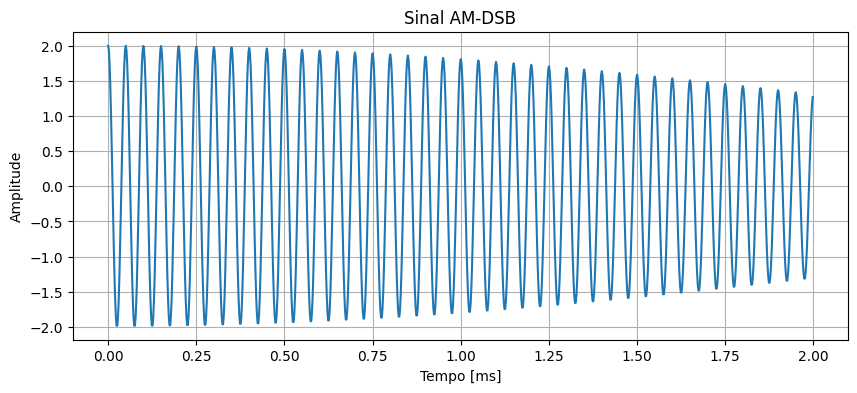

In [3]:
# Índice de modulação (ajustável)
ka = 0.5  

# Sinal AM-DSB
s_am = (1 + ka * m) * c

plt.figure(figsize=(10,4))
plt.plot(t[:1000]*1e3, s_am[:1000])  # primeiros 1000 pontos (ms)
plt.title("Sinal AM-DSB")
plt.xlabel("Tempo [ms]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


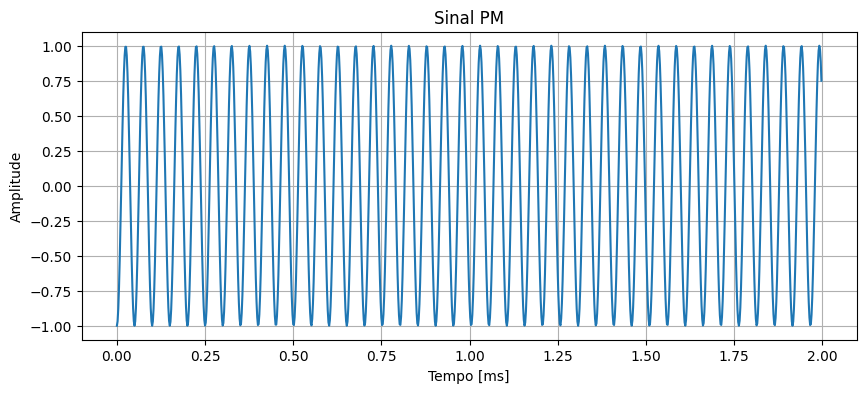

In [4]:
# Desvio de fase
kp = np.pi/2  

# Sinal PM
s_pm = np.cos(2 * np.pi * fc * t + kp * m)

plt.figure(figsize=(10,4))
plt.plot(t[:1000]*1e3, s_pm[:1000])
plt.title("Sinal PM")
plt.xlabel("Tempo [ms]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


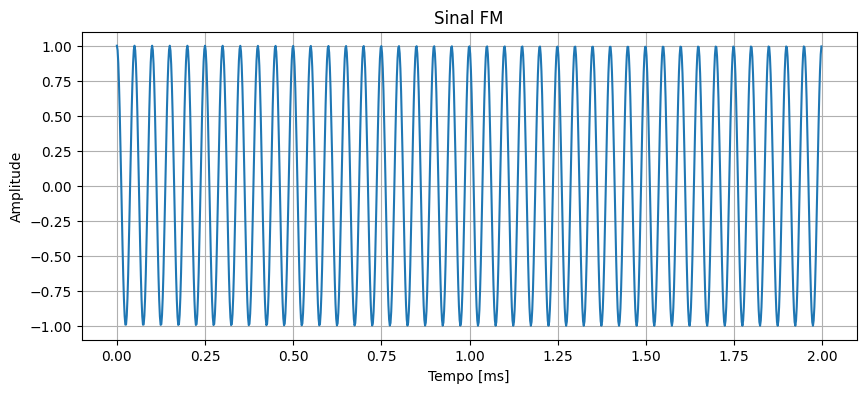

In [5]:
# Desvio de frequência
kf = 50  

# Integral da mensagem
m_int = np.cumsum(m) / fs  

# Sinal FM
s_fm = np.cos(2 * np.pi * fc * t + kf * m_int)

plt.figure(figsize=(10,4))
plt.plot(t[:1000]*1e3, s_fm[:1000])
plt.title("Sinal FM")
plt.xlabel("Tempo [ms]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


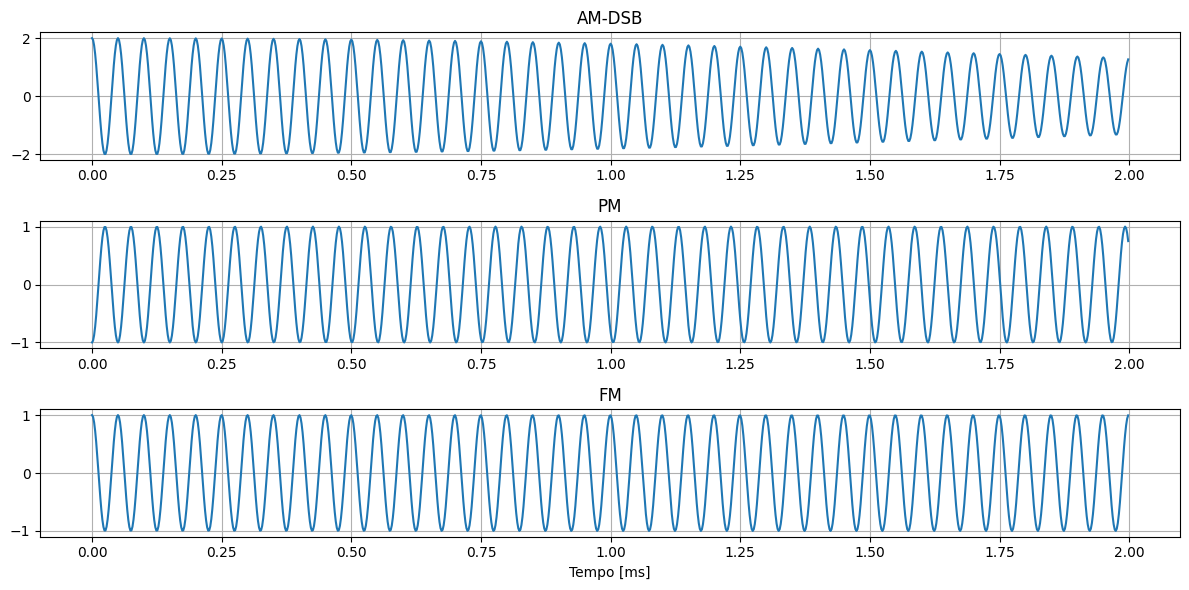

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(t[:1000]*1e3, s_am[:1000])
plt.title("AM-DSB")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t[:1000]*1e3, s_pm[:1000])
plt.title("PM")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t[:1000]*1e3, s_fm[:1000])
plt.title("FM")
plt.xlabel("Tempo [ms]")
plt.grid(True)

plt.tight_layout()
plt.show()


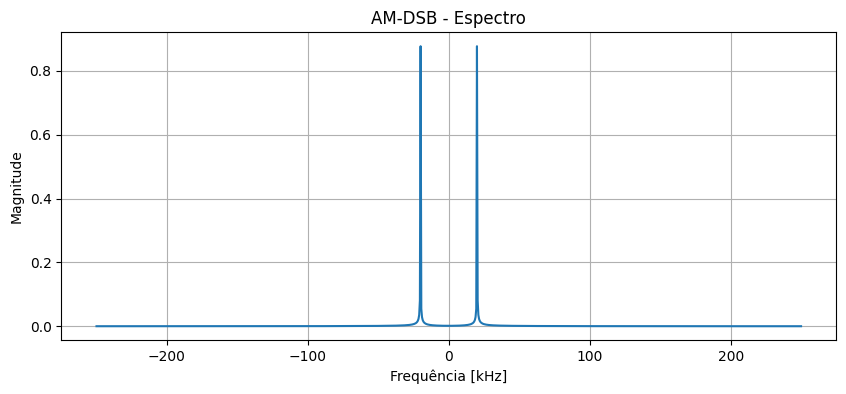

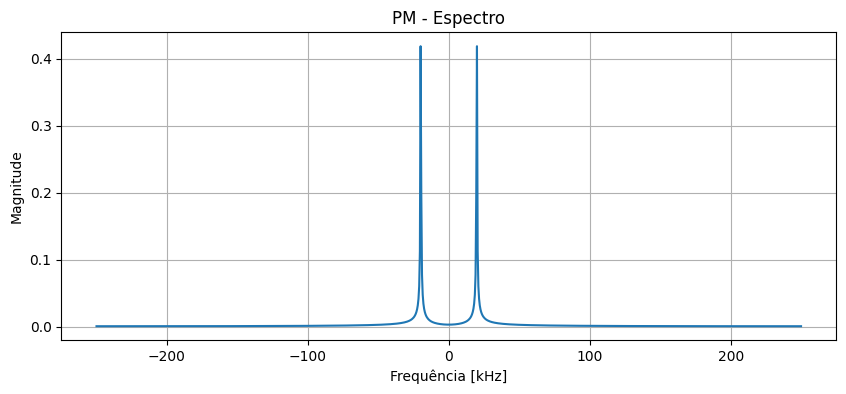

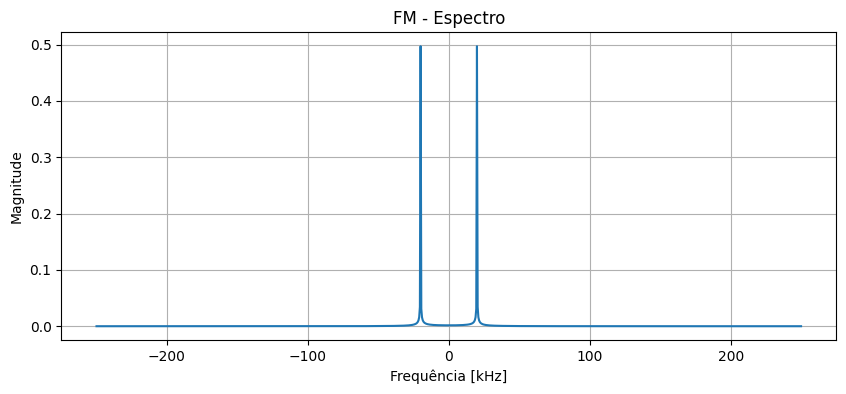

In [7]:
def plot_fft(signal, fs, title):
    N = len(signal)
    f = np.fft.fftfreq(N, 1/fs)
    S = np.fft.fft(signal)
    plt.figure(figsize=(10,4))
    plt.plot(np.fft.fftshift(f)/1e3, np.fft.fftshift(np.abs(S)/N))
    plt.title(title + " - Espectro")
    plt.xlabel("Frequência [kHz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    plt.show()

plot_fft(s_am, fs, "AM-DSB")
plot_fft(s_pm, fs, "PM")
plot_fft(s_fm, fs, "FM")


# Respostas – Laboratório de Modulação Angular Analógica

## 1) Representação dos sinais modulados
Foram gerados os sinais modulados no domínio do tempo considerando:

- **AM-DSB:** \((1 + k_a m(t)) \cdot c(t)\)  
- **PM:** \(\cos(2 \pi f_c t + k_p m(t))\)  
- **FM:** \(\cos(2 \pi f_c t + k_f \int m(t) dt)\)

Os gráficos obtidos mostram claramente a diferença entre as três modulações.

---

## 2) Comparação entre AM-DSB, PM e FM

### Similaridades
- Todos utilizam uma **portadora senoidal** para transportar a informação.
- O sinal resultante mantém a mesma frequência central da portadora.
- Podem ser analisados tanto no **tempo** quanto no **espectro** para identificar suas características.

### Diferenças
- **AM-DSB:** A informação está na **amplitude** da portadora. A largura de banda é proporcional ao dobro da frequência da mensagem.  
- **PM:** A informação está na **fase instantânea** da portadora. A largura de banda depende da amplitude da mensagem.  
- **FM:** A informação está na **frequência instantânea**. A largura de banda depende do desvio de frequência (índice de modulação de Carson).

### Vantagens e Desvantagens
- **AM-DSB**  
  -  Simples de implementar e demodular.  
  -  Menos eficiente em termos de potência, sensível a ruídos em amplitude.  

- **PM**  
  -  Mais resistente a ruídos de amplitude.  
  -  Mais complexo de demodular, largura de banda pode aumentar bastante.  

- **FM**  
  -  Muito robusto contra ruído, alta qualidade de áudio.  
  -  Requer maior largura de banda e circuitos de demodulação mais complexos.  

---

## 3) Aplicações típicas
- **AM-DSB:** Transmissão em rádios AM, sistemas simples de comunicação analógica.  
- **PM:** Comunicação em sistemas digitais (ex.: modulação de fase em PSK), radar.  
- **FM:** Transmissão em rádios FM, TV analógica (som), comunicações via rádio com alta fidelidade.  

---

## 4) Desafio – Espectro
Os espectros mostram:
- **AM-DSB:** Faixa lateral simétrica em torno da portadora, largura de banda \(2f_m\).  
- **PM:** Faixa espectral com múltiplos harmônicos, depende do índice de modulação.  
- **FM:** Espectro distribuído em várias componentes laterais (série de Bessel), maior largura de banda que AM.  
